<IPython.core.display.Javascript object>


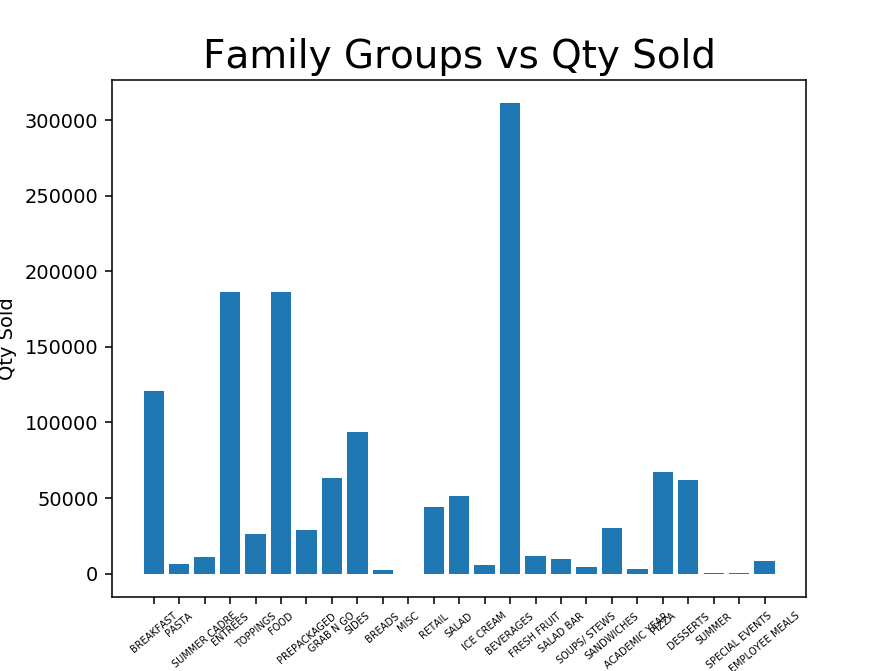

In [27]:
%matplotlib notebook

import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

def csv_to_np_arr(train_path) :
    '''
    Read CSV into list of lists
    '''
    with open(train_path, 'r') as f:
        data = list(csv.reader(f, delimiter=','))
        #print(data[:3])
    data_np = np.array(data)
    return data_np

def unique(data):
    '''
    Collect all unique elements from an array and return list
    '''
    unique_items = list(set(data))
    return unique_items

def plot(data_x, data_y, xlabel, ylabel, title):
    '''
    Plot graphs of group vs quantity sold
    '''
    idx = np.arange(len(data_x))
    plt.bar(idx, data_y)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(idx, data_x, fontsize=5, rotation=40)
    plt.title(title, fontsize=20)
    plt.show()

def qty_for_grp(unique_groups, all_group_data, all_qty_sold) : 
    '''
    Combine qty sold for major groups/family groups
    '''
    qty = []
    for grp in unique_groups:
        idx = []
        per_grp_qty = 0
        for i, x in enumerate(all_group_data):
            if x == grp:
                idx.append(i)
                per_grp_qty += all_qty_sold[i]
        qty.append(per_grp_qty)
    return qty

def main():
    train_path = 'data/f2018.csv'
    data = csv_to_np_arr(train_path)
    
    #Collect unique Major Groups, Family groups and menu item names
    major_groups = unique(data[1:-1:, 2])
    family_group = unique(data[1:-1, 1])
    #unique_menu_items = unique(data_np[1:-1, 0])
    
    menu_items = data[1:-1, 0]
    menu_qty_sold = data[1:-1, 3].astype(int)
    #plot(menu_items, menu_qty_sold, 'Menu Items', 'Qty Sold', 'Menu Items vs Qty Sold')
    
    #Qty_sold as int datatype for plotting and processing
    qty_sold = data[1:-1, 3].astype(int)
    
    mgrp_qty = qty_for_grp(major_groups, data[1:-1:, 2], qty_sold) 
    #plot(major_groups, mgrp_qty, 'Major Groups', 'Qty Sold', 'Major Groups vs Qty Sold')
    
    fgrp_qty = qty_for_grp(family_groups, data[1:-1:, 1], qty_sold) 
    plot(family_groups, fgrp_qty, 'Family Groups', 'Qty Sold', 'Family Groups vs Qty Sold')
    
if __name__ == '__main__':
    main()